In [1]:
import pandas as pd
import numpy as np
import re # Regular Expression

In [2]:
message = 'Hi'
file = open('Demo.txt','w')
file.write(message)
file.close()



In [3]:
import pandas as pd

email = []
classification = []

for row in pd.read_csv('Data/sms.txt', sep='\t', header=None, chunksize=10000):
    email.extend(row.iloc[:, 1].tolist())
    classification.extend(row.iloc[:, 0].tolist())

print("First 5 Emails:", email[:5])
print("First 5 Classifications:", classification[:5])


First 5 Emails: ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]
First 5 Classifications: ['ham', 'ham', 'spam', 'ham', 'ham']


In [4]:
msg = '\nHi from Upfalirs'

file = open('Demo.txt','a')
for i in range(1000):
    file.write(msg)
file.close()

In [5]:
file_path = 'Data/sms.txt'

file = open(file_path)
data = file.read()
file.close()

In [6]:
print("Total Emails : ",len(data.split('\n')))

Total Emails :  5575


In [7]:
x = []
y = []
for line in data.split('\n'):
    if len(line.split('\t')) == 2:
        y.append(line.split('\t')[0])
        x.append(line.split('\t')[1])

len(x),len(y)

(5574, 5574)

In [8]:
# create a dataframe
dt = {
    'Emails_Message':x,
    'Labels':y
}
email_data = pd.DataFrame(dt)
email_data.head()

,Emails_Message,Labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


**Text Cleaning**

In [9]:
df2 = pd.read_table(file_path)
df2.columns=["labels",'email_message']
df2.head()

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [10]:
print("Total no. of emails :",df2.shape[0])

Total no. of emails : 5571


In [11]:
single_email = df2['email_message'][1]
single_email

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [12]:
type(single_email)

str

In [13]:
single_email = single_email.lower()
single_email

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"

In [14]:
import re # regular expression

In [15]:
re.findall("21st",single_email)

['21st']

In [16]:
re.sub("[^a-zA-Z ]","",single_email)

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [17]:
for i in df2['email_message']:
    i = i.lower()
    re.sub("[^a-zA-Z ]","",i)

In [18]:
df2['email_message']

0                           Ok lar... Joking wif u oni...
1       Free entry in 2 a wkly comp to win FA Cup fina...
2       U dun say so early hor... U c already then say...
3       Nah I don't think he goes to usf, he lives aro...
4       FreeMsg Hey there darling it's been 3 week's n...
                              ...                        
5566    This is the 2nd time we have tried 2 contact u...
5567                 Will ü b going to esplanade fr home?
5568    Pity, * was in mood for that. So...any other s...
5569    The guy did some bitching but I acted like i'd...
5570                           Rofl. Its true to its name
Name: email_message, Length: 5571, dtype: object

In [19]:

df2['email_message'] = df2['email_message'].str.lower()
df2['email_message'] = df2['email_message'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))
df2['email_message']

0                                 ok lar joking wif u oni
1       free entry in  a wkly comp to win fa cup final...
2             u dun say so early hor u c already then say
3       nah i dont think he goes to usf he lives aroun...
4       freemsg hey there darling its been  weeks now ...
                              ...                        
5566    this is the nd time we have tried  contact u u...
5567                   will  b going to esplanade fr home
5568    pity  was in mood for that soany other suggest...
5569    the guy did some bitching but i acted like id ...
5570                            rofl its true to its name
Name: email_message, Length: 5571, dtype: object

In [20]:
df2['labels'].value_counts()
# Smote 

labels
ham     4824
spam     747
Name: count, dtype: int64

In [21]:
ham = df2[df2['labels'] == 'ham']
spam = df2[df2['labels'] == 'spam']

In [22]:
ham.head()

,labels,email_message
0,ham,ok lar joking wif u oni
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives aroun...
5,ham,even my brother is not like to speak with me t...
6,ham,as per your request melle melle oru minnaminun...


In [23]:
spam.head()

,labels,email_message
1,spam,free entry in a wkly comp to win fa cup final...
4,spam,freemsg hey there darling its been weeks now ...
7,spam,winner as a valued network customer you have b...
8,spam,had your mobile months or more u r entitled t...
10,spam,six chances to win cash from to pounds txt c...


In [24]:
ham = ham.sample(1000)

In [25]:
ham.shape

(1000, 2)

In [26]:
# spam = spam.sample(1000,replace=True)

In [27]:
new_df = pd.concat([spam,ham],axis=0)

In [28]:
new_df.shape

(1747, 2)

In [29]:
new_df.duplicated().sum()

np.int64(154)

In [30]:
new_df['labels'] = new_df['labels'].map({'spam':1,'ham':0})

In [31]:
x = new_df['email_message']
y = new_df['labels']

In [32]:
x = x.values
type(x)

numpy.ndarray

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

bow_obj = CountVectorizer(max_features=1500,stop_words='english')

X = bow_obj.fit_transform(x)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12663 stored elements and shape (1747, 1500)>

In [34]:
X_transformed = X.toarray()

In [35]:
X_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y

1       1
4       1
7       1
8       1
10      1
       ..
1845    0
5359    0
157     0
4465    0
3018    0
Name: labels, Length: 1747, dtype: int64

In [37]:
X_transformed.shape

(1747, 1500)

In [38]:
y.shape

(1747,)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.15,random_state=42)

In [40]:
# Model training algorithm train

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(x_train,y_train)

bnb.fit(x_train,y_train)

print("Algorithem Trained !")

Algorithem Trained !


In [41]:
print("Multinomial Navie Bayes : ")
print("Training : ",mnb.score(x_train,y_train))
print("Testing : ",mnb.score(x_test,y_test))

print("Bernoli Navie Bayes : ")
print("Training : ",bnb.score(x_train,y_train))
print("Testing : ",bnb.score(x_test,y_test))

Multinomial Navie Bayes : 
Training :  0.967654986522911
Testing :  0.9429657794676806
Bernoli Navie Bayes : 
Training :  0.9568733153638814
Testing :  0.9391634980988594


In [42]:
### Prediction

prediction = mnb.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [43]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [44]:
evaluation_df = pd.DataFrame({"Actual_Class":y_test.values,"Predicted_Class":prediction})
evaluation_df.head(40)

,Actual_Class,Predicted_Class
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


In [45]:
evaluation_df['Actual_Class']=evaluation_df['Actual_Class'].map({1:'spam',0:'ham'})
evaluation_df['Predicted_Class']=evaluation_df['Predicted_Class'].map({1:'spam',0:'ham'})

In [46]:
evaluation_df.head(40)

,Actual_Class,Predicted_Class
0,ham,ham
1,ham,ham
2,spam,spam
3,spam,spam
4,spam,spam
5,ham,ham
6,ham,ham
7,spam,spam
8,spam,spam
9,spam,spam


In [47]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

cm = confusion_matrix(evaluation_df['Actual_Class'], evaluation_df['Predicted_Class'])

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[135   6]
 [  9 113]]


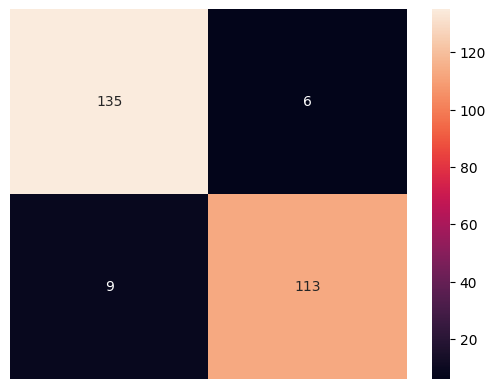

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt='d')
plt.axis('off')
plt.show()

In [49]:
print(classification_report(evaluation_df['Actual_Class'], evaluation_df['Predicted_Class']))

              precision    recall  f1-score   support

         ham       0.94      0.96      0.95       141
        spam       0.95      0.93      0.94       122

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263



In [50]:
# saving model

import joblib,os

os.makedirs('Models',exist_ok=True)

joblib.dump(bnb,'Models/Bernouli_Model.lb')
joblib.dump(mnb,'Models/Multinomial_Model.lb')
joblib.dump(bow_obj,'Models/countvectorizer.lb')

['Models/countvectorizer.lb']